In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import imutils

In [31]:
image = cv2.imread('./arisu_mia.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height=500)  # resize image to have a height of 500px

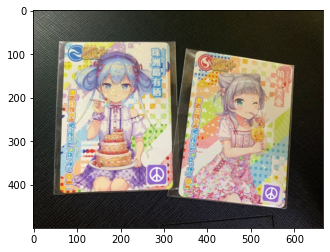

In [37]:
plt.imshow(image)
plt.show()

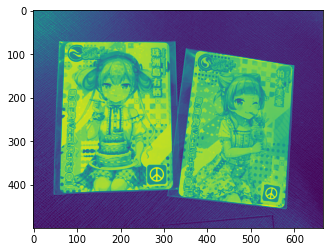

In [38]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray)
plt.show()


In [36]:
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)

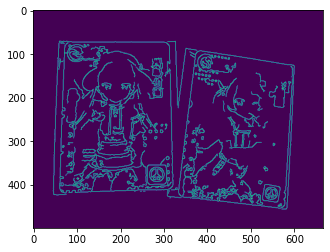

In [17]:
plt.imshow(edged)
plt.show()